In [10]:
#MAKING FUNCTION FOR WORD CLOUD
word_cloud.fun<-function (csv_or_text_file){
  x<-csv_or_text_file
  # Load LIBRARY
  library("tm")
  library("SnowballC")
  library("wordcloud")
  library("RColorBrewer")
  text <- readLines(x)
  docs <- Corpus(VectorSource(text))
  #SURPASING WARNINGS CHANGE TO 0 FOR WARNING MESSAGE
  options(warn=-1)
  toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
  docs <- tm_map(docs, toSpace, "/")
  docs <- tm_map(docs, toSpace, "@")
  docs <- tm_map(docs, toSpace, "\\|")
  # Convert the text to lower case
  docs <- tm_map(docs, content_transformer(tolower))
  # Remove numbers
  docs <- tm_map(docs, removeNumbers)
  # Remove english common stopwords
  docs <- tm_map(docs, removeWords, stopwords("english"))
  # Remove your own stop word
  # specify your stopwords as a character vector
  docs <- tm_map(docs, removeWords, c("blabla1", "blabla2")) 
  # Remove punctuations
  docs <- tm_map(docs, removePunctuation)
  # Eliminate extra white spaces
  docs <- tm_map(docs, stripWhitespace)
  # Text stemming
  # docs <- tm_map(docs, stemDocument)
  dtm <- TermDocumentMatrix(docs)
  m <- as.matrix(dtm)
  v <- sort(rowSums(m),decreasing=TRUE)
  d <- data.frame(word = names(v),freq=v)
  set.seed(1000)
  wordcloud(words = d$word, freq = d$freq, min.freq = 2,
            max.words=200, random.order=FALSE, rot.per=0.35, 
            colors=brewer.pal(8, "Dark2"))
}

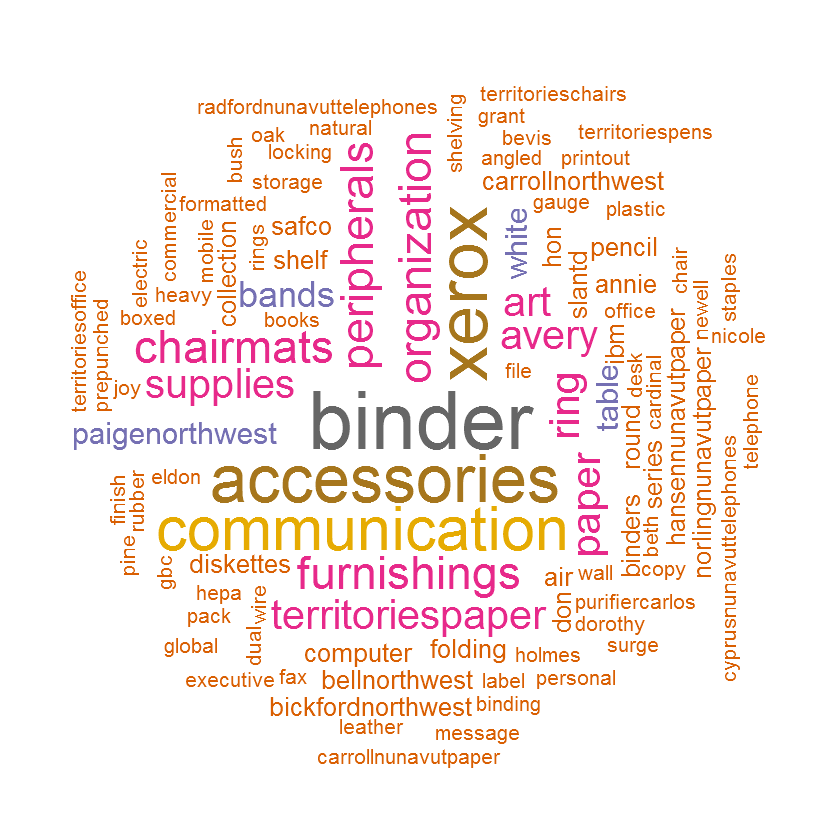

In [9]:
#ENTRE YOUR PATH FOR CSV OR TEXT FILE
word_cloud.fun("D:\\R_pro_files\\wc.csv")